<a href="https://colab.research.google.com/github/JFaberSFSD/Food_Sales_Predictions/blob/main/Sales_Predictions_Data_Cleanup_with_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Justin Faber - Sales Predictions Project
##June 2022


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Sales_Data = pd.read_csv("/content/drive/MyDrive/01 - Week 1 (June 20th)/sales_predictions.csv")

Sales_Data.head(100)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,NaN,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,NaN,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


In [6]:
#Let's see what we're working with here in terms of rows & columns

Sales_Data.shape

(8523, 12)

In [7]:
#Now let's look at data types for each variable

Sales_Data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#Let's check for any duplicates in our dataframe that may cause our analysis to be skewed

Sales_Data.duplicated().sum()

0

In [9]:
#Let's check for any missing or null values in our dataframe

Sales_Data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#It looks like we have a bunch of missing values in both the Item_Weight column and the Outlet_Size column
#First let's look at Item_Weight and dive a little deeper

Sales_Data['Item_Weight'].describe()

#Not super helpful so far. Although one thing I am noticing is that it appears that the first column "Item_Identifier" is specific to each unique item, let's check to see if we can use this to identify the true value of any missing weights

#To verify this theory is correct, let's make sure that the weight is always the same for every unique Item_Identifier

Sales_Data.groupby('Item_Identifier')['Item_Weight'].nunique().max()

#This confirms that there are never multiple weights for any given Item_Identifier. 

#I spent quite a bit of time looking up different ways to do this in pandas, including different indexing and join methods, or create look-up tables, etc
#Realized that this type of data manipulation to quickly fill-in known values was MUCH easier in excel, so I simply modified the data there and created a new CSV file
#Sorry not sorry - work smarter not harder :) 

#Updated in Excel - filled all known missing Item_Weight values
#Updated in Excel - filled all known missing Outlet_Size values

#Let's load our updated dataframe and replace the previous one

Sales_Data_Final = pd.read_csv('/content/drive/MyDrive/01 - Week 1 (June 20th)/Sales_Predictions_Updated.csv')

Sales_Data_Final.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
#Now that we've done most of the clean-up work in Excel, let's take a second look at our data

Sales_Data_Final.isna().sum()

#There are still 555 values in the Outlet_Size column that are null. When looking over this data it was noticed that all null values are for Tier 3 Grocery Stores
#There are no Tier 3 Grocery stores to try to impute a value, so we will simply assign these with the value "Unknown"

Sales_Data_Final['Outlet_Size'].fillna('Unknown',inplace=True)

Sales_Data_Final.isna().sum()

#We still have 4 rows where the Item_Weight column has a null value (and no available lookup). With only 4 rows missing data, let's remove those rows from our dataframe

Sales_Data_Final.dropna(subset=['Item_Weight'],inplace=True)

Sales_Data_Final.isna().sum()

#We have now eliminated all null values! 


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#Let's take a look now at categorical columns to make sure there's no cleanup we need to do
#We can take a look at individual columns using the .value_counts() method 

#Our first candidate for cleanup is the "Item_Fat_Content" column, which really only has two values "Low Fat" and "Regular"
#Let's replace the abbreviations and alternate versions with the standard string

Sales_Data_Final['Item_Fat_Content'].value_counts()

Sales_Data_Final['Item_Fat_Content'] = Sales_Data_Final['Item_Fat_Content'].replace("LF","Low Fat")
Sales_Data_Final['Item_Fat_Content'] = Sales_Data_Final['Item_Fat_Content'].replace("reg","Regular")
Sales_Data_Final['Item_Fat_Content'] = Sales_Data_Final['Item_Fat_Content'].replace("low fat","Low Fat")

Sales_Data_Final['Item_Fat_Content'].value_counts()

#Fixed! 

#No other categorical columns appeared to have duplicates or unnecesarry values

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [13]:
#Let's pull a quick summary on all numerical columns of our dataframe

Sales_Data_Final['Item_Weight'].describe().round(2)

count    8519.00
mean       12.88
std         4.65
min         4.56
25%         8.78
50%        12.65
75%        16.85
max        21.35
Name: Item_Weight, dtype: float64

In [14]:
Sales_Data_Final['Item_Visibility'].describe().round(2)

count    8519.00
mean        0.07
std         0.05
min         0.00
25%         0.03
50%         0.05
75%         0.09
max         0.33
Name: Item_Visibility, dtype: float64

In [15]:
Sales_Data_Final['Item_MRP'].describe().round(2)

count    8519.00
mean      141.01
std        62.28
min        31.29
25%        93.84
50%       143.05
75%       185.68
max       266.89
Name: Item_MRP, dtype: float64

In [16]:
Sales_Data_Final['Item_Outlet_Sales'].describe().round(2)

count     8519.00
mean      2181.19
std       1706.51
min         33.29
25%        834.25
50%       1794.33
75%       3100.63
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

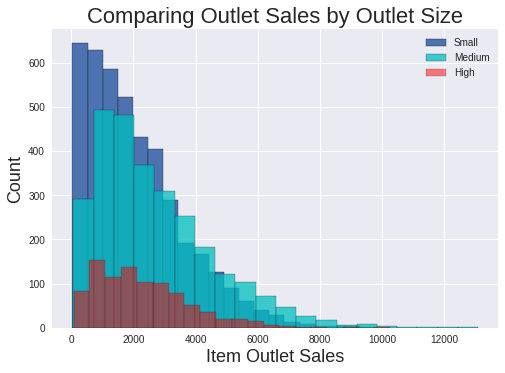

In [17]:
Small_Outlet_Filt = Sales_Data_Final['Outlet_Size'] == 'Small'
Medium_Outlet_Filt = Sales_Data_Final['Outlet_Size'] == 'Medium'
High_Outlet_Filt = Sales_Data_Final['Outlet_Size'] == 'High'

Small_Outlets = Sales_Data_Final[Small_Outlet_Filt]
Medium_Outlets = Sales_Data_Final[Medium_Outlet_Filt]
High_Outlets = Sales_Data_Final[High_Outlet_Filt]

plt.style.use('seaborn')
Small_Outlets['Item_Outlet_Sales'].hist(bins=20,edgecolor='black')
plt.xlabel('Item Outlet Sales',fontsize = 18)
plt.title('Comparing Outlet Sales by Outlet Size',fontsize = 22)
plt.ylabel('Count',fontsize = 18)


plt.style.use('seaborn')
Medium_Outlets['Item_Outlet_Sales'].hist(bins=20,edgecolor='black',color='c',alpha=.75)


plt.style.use('seaborn')
High_Outlets['Item_Outlet_Sales'].hist(bins=20,edgecolor='black',color='r',alpha=.5)


plt.legend(['Small','Medium','High'])

plt.ticklabel_format(useOffset=False, style='plain')

In [18]:
Sales_Data_Final['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


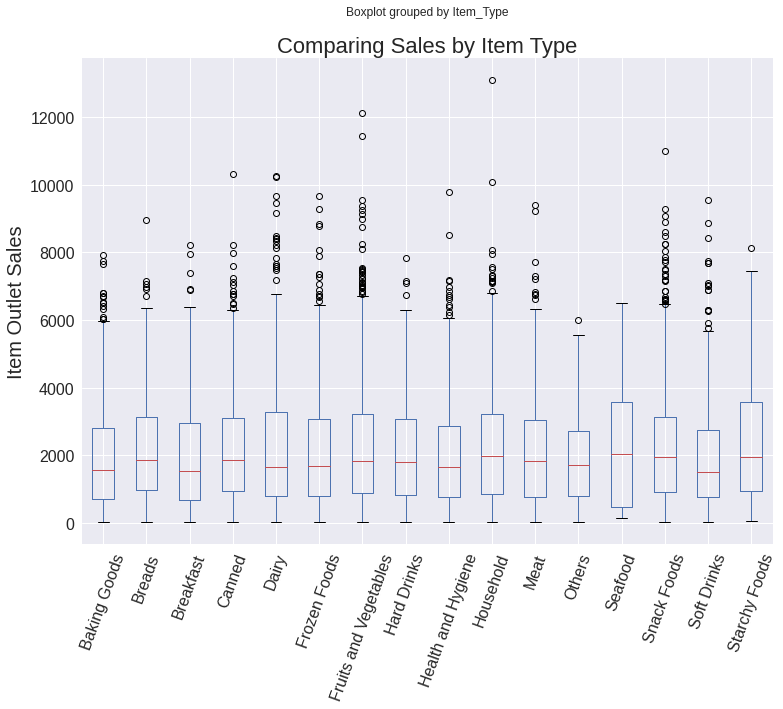

In [19]:
fig, ax = plt.subplots(figsize = (12,9));
Sales_Data_Final.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', ax=ax);
plt.xlabel('', fontsize = 20);
plt.ylabel('Item Outlet Sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.xticks(rotation = 70);
plt.title("Comparing Sales by Item Type", fontsize = 22);
plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Item Sales by Outlet Type')

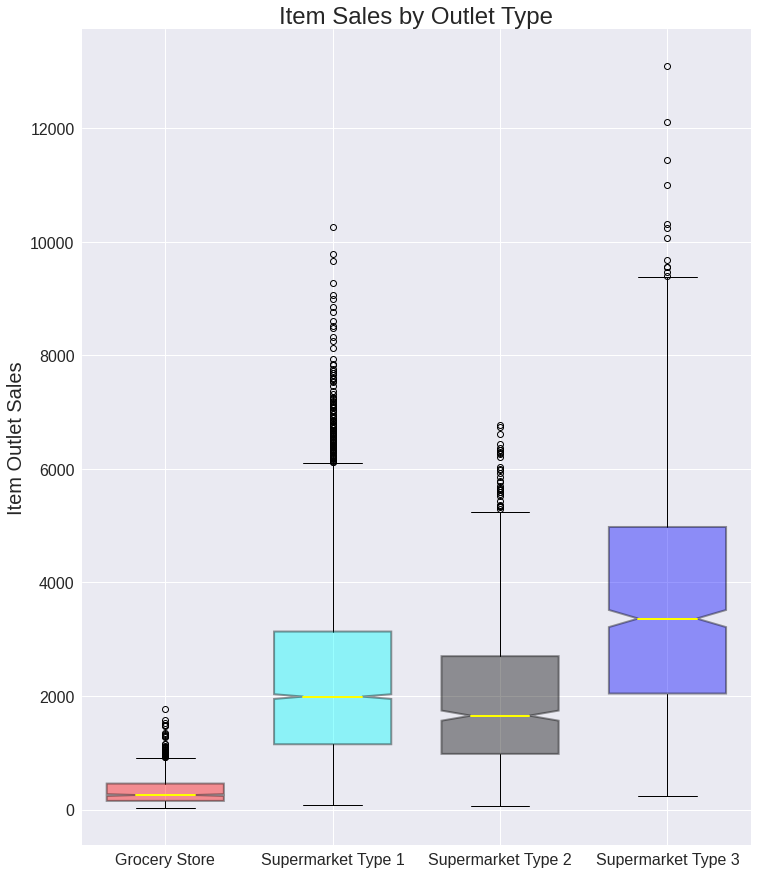

In [30]:
Grocery_Store = Sales_Data_Final.loc[Sales_Data_Final['Outlet_Type']=='Grocery Store','Item_Outlet_Sales']
Supermarket_Type1 = Sales_Data_Final.loc[Sales_Data_Final['Outlet_Type']=='Supermarket Type1','Item_Outlet_Sales']
Supermarket_Type2 = Sales_Data_Final.loc[Sales_Data_Final['Outlet_Type']=='Supermarket Type2','Item_Outlet_Sales']
Supermarket_Type3 = Sales_Data_Final.loc[Sales_Data_Final['Outlet_Type']=='Supermarket Type3','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,15))
boxplots = axes.boxplot([Grocery_Store,Supermarket_Type1,Supermarket_Type2,Supermarket_Type3],
           notch = True,
           labels=['Grocery Store', 'Supermarket Type 1','Supermarket Type 2', 'Supermarket Type 3'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('cyan')
boxplot3 = boxplots['boxes'][2]
boxplot3.set_facecolor('black')
plt.xlabel('', fontsize = 20);
plt.ylabel('Item Outlet Sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Item Sales by Outlet Type',fontsize=24)


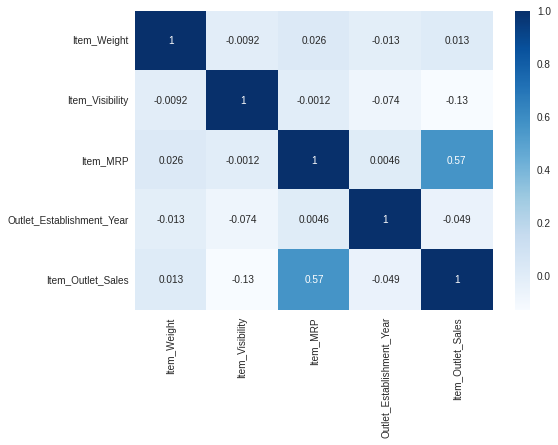

In [23]:
corr = Sales_Data_Final.corr()
sns.heatmap(corr, cmap = 'Blues',annot=True)